## Assignment 1: Data Analysis and Machine Learning

### Ky Cuong Pham a1906313

#### How can we use data analytics and Machine Learning to predict energy usage for this house?

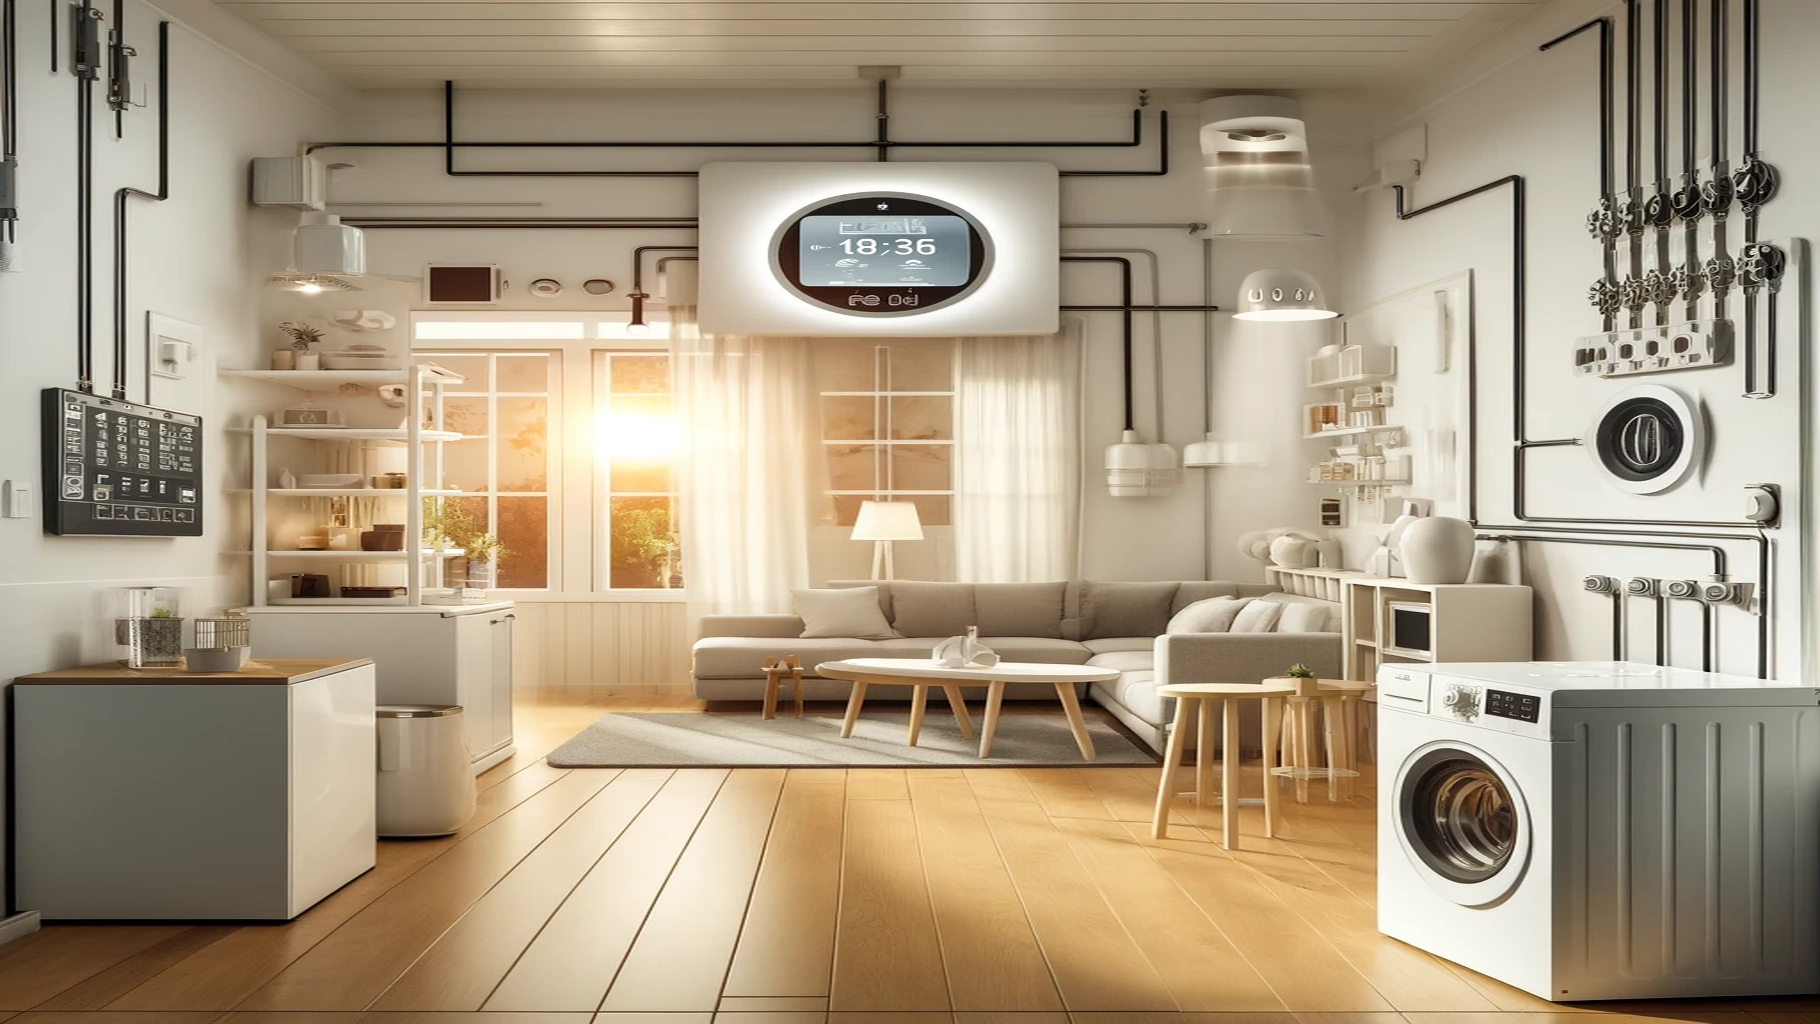

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

In [2]:
# seed the random numbers for reproducibility 
# do not remove this line
import random 
random.seed(10)

### 1. Analyse and visualise the data

#### 1.1. Read the dataset

In [9]:
import pandas as pd 

df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,14/02/2016 0:00,50,10,21.790000,39.900000,20.100000,40.79,21.39,40.59,19.2,...,18.0,41.933333,2.90,732.90,98.000000,2.000000,31.0,2.6,48.320978,48.320978
1,14/02/2016 0:10,50,0,21.790000,39.900000,20.033333,40.73,21.39,40.59,19.2,...,18.0,42.133333,2.87,732.95,98.166667,2.166667,28.5,2.6,33.339359,33.339359
2,14/02/2016 0:20,60,10,21.700000,39.933333,19.890000,40.79,21.39,40.53,19.2,...,18.0,42.360000,2.83,733.00,98.333333,2.333333,26.0,2.6,8.168115,8.168115
3,14/02/2016 0:30,40,0,21.633333,39.860000,19.890000,40.79,21.39,40.59,19.2,...,18.0,42.633333,2.80,733.05,98.500000,2.500000,23.5,2.6,16.197509,16.197509
4,14/02/2016 0:40,60,10,21.600000,39.900000,19.790000,40.79,21.39,40.59,19.1,...,18.0,42.860000,2.77,733.10,98.666667,2.666667,21.0,2.6,12.559574,12.559574


In [12]:
# date time year-month-day hour:minute:second 
# Appliances, energy use in Wh
# lights, energy use of light fixtures in the house in Wh
# T1, Temperature in kitchen area, in Celsius
# RH_1, Humidity in kitchen area, in %
# T2, Temperature in living room area, in Celsius
# RH_2, Humidity in living room area, in %
# T3, Temperature in laundry room area
# RH_3, Humidity in laundry room area, in %
# T4, Temperature in office room, in Celsius
# RH_4, Humidity in office room, in %
# T5, Temperature in bathroom, in Celsius
# RH_5, Humidity in bathroom, in %
# T6, Temperature outside the building (north side), in Celsius
# RH_6, Humidity outside the building (north side), in %
# T7, Temperature in ironing room , in Celsius
# RH_7, Humidity in ironing room, in %
# T8, Temperature in teenager room 2, in Celsius
# RH_8, Humidity in teenager room 2, in %
# T9, Temperature in parents room, in Celsius
# RH_9, Humidity in parents room, in %
# To_out, Temperature outside (from Chievres weather station), in Celsius
# Press_mg_hg, Pressure (from Chievres weather station), in mm Hg
# RH_out, Humidity outside (from Chievres weather station), in %
# Wind speed (from Chievres weather station), in m/s
# Visibility (from Chievres weather station), in km
# Tdewpoint (from Chievres weather station), Â°C
# rv1, Random variable 1, nondimensional
# rv2, Random variable 2, nondimensional

# !!!rv1 and rv2 are just for testing the robustness of the model, it should not rely on these variables
# the model should be able to predict the energy use without these variables
print(f"Shape of the df: {df.shape}")
print(f"Columns in the df: {df.columns}")

Shape of the df: (14941, 29)
Columns in the df: Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


#### 1.2. Analyse data characteristics

In [16]:
# Analyse data characteristics (dependencies, distributions, etc.) that may affect the prediction task, and visualise them using suitable techniques and charts. Include required charts, diagrams, tables and discussion in Jupyter Notebook.

# checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         14941 non-null  object 
 1   Appliances   14941 non-null  int64  
 2   lights       14941 non-null  int64  
 3   T1           14941 non-null  float64
 4   RH_1         14941 non-null  float64
 5   T2           14941 non-null  float64
 6   RH_2         14941 non-null  float64
 7   T3           14941 non-null  float64
 8   RH_3         14941 non-null  float64
 9   T4           14941 non-null  float64
 10  RH_4         14941 non-null  float64
 11  T5           14941 non-null  float64
 12  RH_5         14941 non-null  float64
 13  T6           14941 non-null  float64
 14  RH_6         14941 non-null  float64
 15  T7           14941 non-null  float64
 16  RH_7         14941 non-null  float64
 17  T8           14941 non-null  float64
 18  RH_8         14941 non-null  float64
 19  T9  

In [17]:
# checking for missing values
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [18]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

<Figure size 1200x600 with 0 Axes>

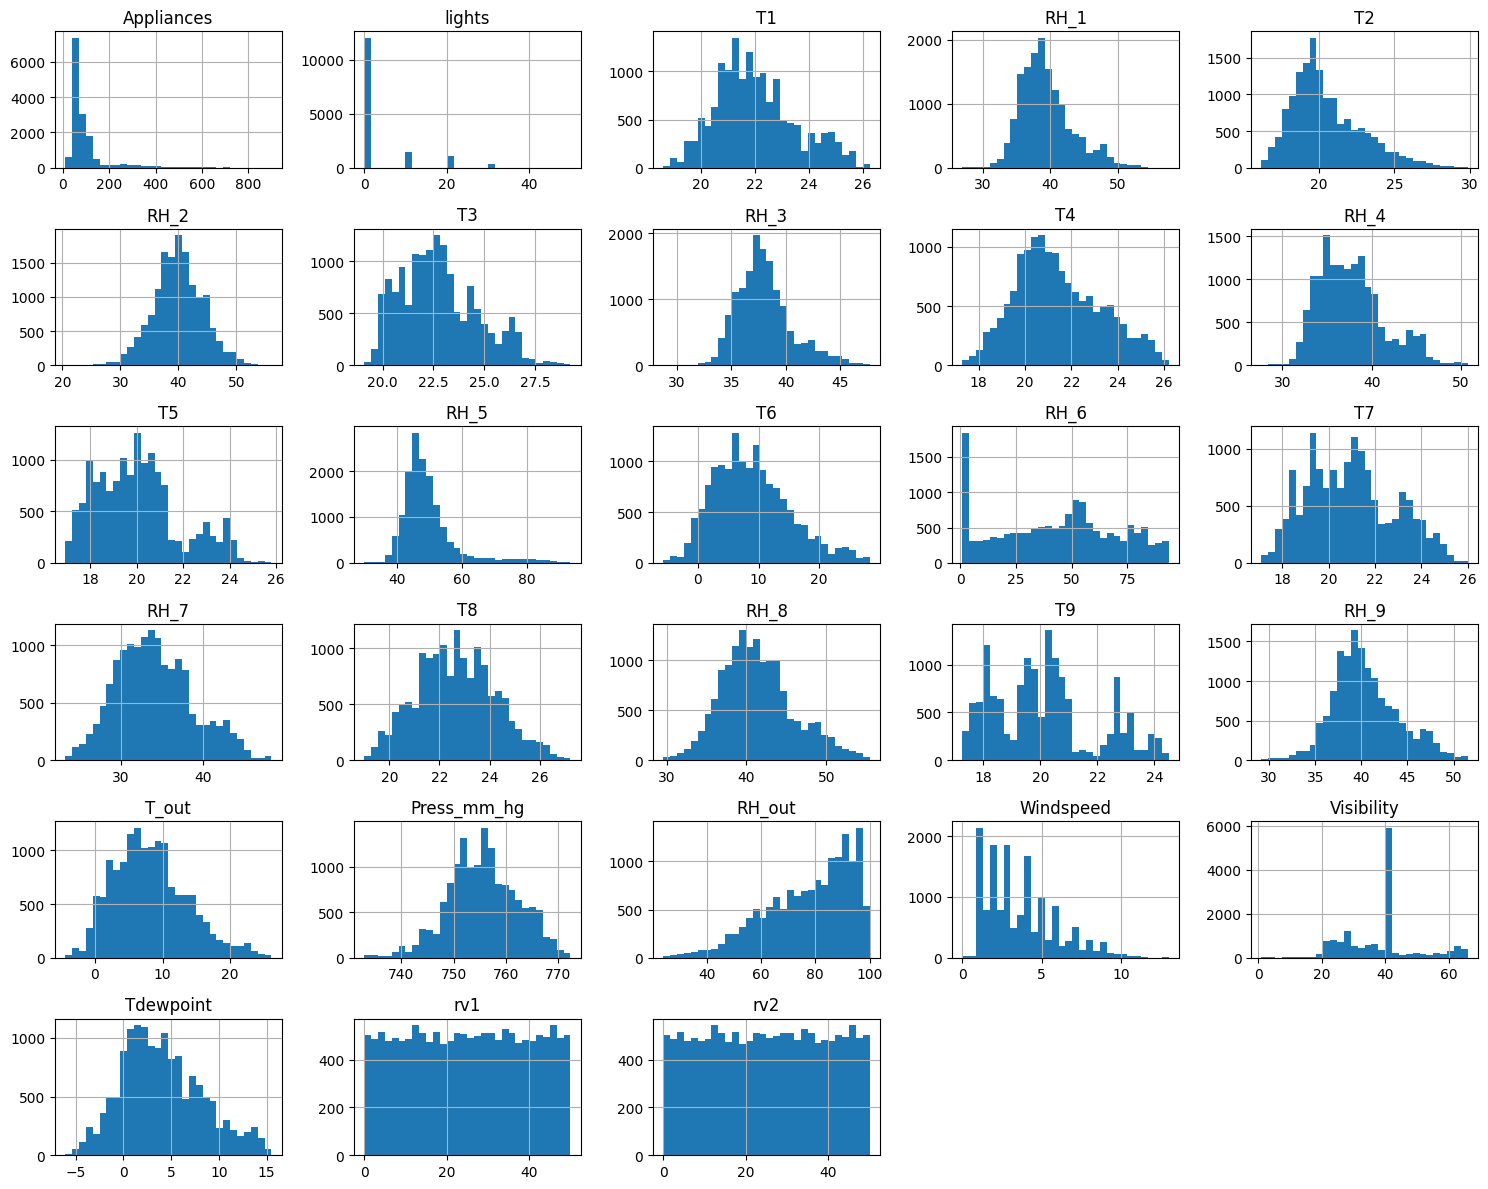

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

In [ ]:
# 3. Discuss the results of your analysis and visualisation. Make sure your charts are of good quality and useful, there is no point to make a chart or a table, if it is not referred to in your discussion. 


### 2. Pre-process the data

### 3. Implement, train and select prediction models

### 4. Test the final model and analyse results

### 5. Reflection

Follow the guidelines in the assignment specification


### 6. References

### 7. Appendix

Use this section as needed for longer analysis and expanded charting